In [1]:
!pip install lifelines

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 6.8 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=b4223f32657f4d069a898056cc24ab9c25531c524298c895475609cffb38df2d
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


In [2]:
import pandas as pd
from lifelines import KaplanMeierFitter

In [3]:
# Loading the the survival un-employment data
survival_unemp = pd.read_csv("survival_unemployment.csv")

In [4]:
survival_unemp.head()

,spell,event,ui,logwage,age
0,5,1,0,6.89568,41
1,13,1,1,5.28827,30
2,21,1,1,6.76734,36
3,3,1,1,5.97889,26
4,9,0,1,6.31536,22


In [5]:
survival_unemp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3343 entries, 0 to 3342
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   spell    3343 non-null   int64  
 1   event    3343 non-null   int64  
 2   ui       3343 non-null   int64  
 3   logwage  3343 non-null   float64
 4   age      3343 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 130.7 KB


In [6]:
# Spell column is referring to time
T = survival_unemp.spell
T

,spell
0,5
1,13
2,21
3,3
4,9
...,...
3338,11
3339,4
3340,5
3341,1


In [7]:
# Initiating the KaplanMeierFitter model
kmf = KaplanMeierFitter()

<Axes: xlabel='timeline'>

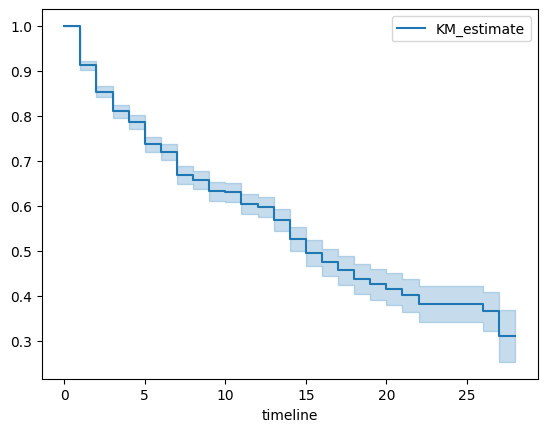

In [8]:
# Fitting KaplanMeierFitter model on Time and Events
kmf.fit(T,event_observed=survival_unemp.event)# T - time, event_obsserved: whether event occurred or not
# Time-line estimations plot
kmf.plot()
# This is K-M estimation curve. Shaded region is 95% confidence interval.

In [9]:
# Over Multiple groups
# For each group, here group is ui - unemployment insurance
survival_unemp.ui.value_counts()

,count
ui,
1,1848
0,1495


<Axes: xlabel='timeline'>

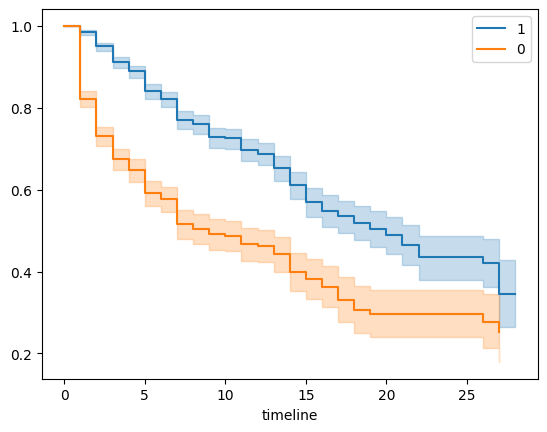

In [10]:
# comparison of 2 groups
# Applying KaplanMeierFitter model on Time and Events for the group "1"
kmf.fit(T[survival_unemp.ui==1], survival_unemp.event[survival_unemp.ui==1], label='1')
kmf.plot()

# Applying KaplanMeierFitter model on Time and Events for the group "0"
kmf.fit(T[survival_unemp.ui==0], survival_unemp.event[survival_unemp.ui==0], label='0')
kmf.plot()
